# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
display(heroes_df.head())
display(powers_df.head())

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
## Only common section between data frames is hero_names, though they are noted differently here
## Check to see if either of the list can be 
alpha_heroes = powers_df.sort_values(by=['hero_names'], ascending=[True])
alpha_heroes
# alpha_powers = powers_df.sort_values(by=['hero_names'], ascending=[True])
# alpha_powers

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df = heroes_df.drop(columns='Unnamed: 0')
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
display(heroes_df.info())
display(powers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

The number of entries in both dataframes don't match, meaning there may be a few different hero entries between the  dataframes. Maybe compare the unique names list of both to see which are different between the two.

In [6]:
# pd.plotting.scatter_matrix(heroes_df, figsize=(10,10));

In [7]:
## Might be useful to check for duplicates in hero before making 
## any certain decisions:

dupl_heroes = heroes_df[heroes_df.duplicated()]
print(len(dupl_heroes))
display(dupl_heroes.head())

dupl_powers = powers_df[powers_df.duplicated()]
print(len(dupl_powers))
display(dupl_powers.head())

1


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


It appears the heroes dataframe has one duplicate. Let's deal with that, then move on.

In [8]:
##check to see if duplicate dropping code works
# dropped_heroes = heroes_df.drop_duplicates()
# dup_drop = dropped_heroes[dropped_heroes.duplicated()]
# print(len(dup_drop))
# display(dup_drop.head())

## drop duplicates and apply changes to general dataframe and Check to see how many duplicates remain

heroes_df = heroes_df.drop_duplicates()
print(len(heroes_df[heroes_df.duplicated()]))

0


In [9]:
## Explore Distrubution of Dataframes
for col in heroes_df.columns:
    print(col, '\n', heroes_df[col].value_counts(normalize=True).head(), '\n\n')

## Copy and do the same for the powers dataframe
# for col in powers_df.columns:
#     print(col, '\n', powers_df[col].value_counts(normalize=True).head(), '\n\n')

name 
 Spider-Man    0.004093
Speedy        0.002729
Angel         0.002729
Vindicator    0.002729
Atlas         0.002729
Name: name, dtype: float64 


Gender 
 Male      0.687585
Female    0.272851
-         0.039563
Name: Gender, dtype: float64 


Eye color 
 blue     0.306958
-        0.233288
brown    0.171896
green    0.099591
red      0.062756
Name: Eye color, dtype: float64 


Race 
 -                0.414734
Human            0.282401
Mutant           0.085948
God / Eternal    0.019100
Cyborg           0.015007
Name: Race, dtype: float64 


Hair color 
 -          0.233288
Black      0.215553
Blond      0.135061
Brown      0.117326
No Hair    0.102319
Name: Hair color, dtype: float64 


Height 
 -99.0     0.294679
 183.0    0.080491
 188.0    0.069577
 178.0    0.053206
 180.0    0.051842
Name: Height, dtype: float64 


Publisher 
 Marvel Comics        0.538997
DC Comics            0.299443
NBC - Heroes         0.026462
Dark Horse Comics    0.025070
George Lucas         0.019499

In [10]:
# heroes_df.groupby('name')['Height', 'Weight'].count()
# heroes_df.plot(kind='barh', x = 'name', y = 'Weight', figsize=(15,8))
## this plot looks messy as hell, but it perhaps might be better to graph
## in bins...but how would you figure out the bin size
## i'm thinking it should be split male/female, and then maybe 8 bins..
## BOOM...and there it goes...i should do try a histogram with bins instead

Mean Value for Weight column: 44.05
Median Value for Weight column: 62.0
Standard Deviation Value for Weight column: 130.81


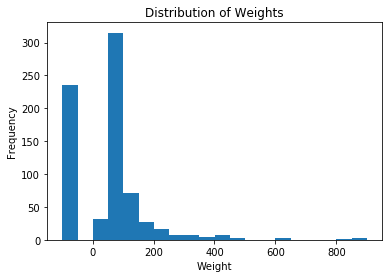

In [11]:
## Histogram of Weights

heroes_df['Weight'].plot(kind='hist', bins=20);
plt.title('Distribution of Weights');
plt.xlabel('Weight');

weight_mean = round(heroes_df['Weight'].mean(),2)
weight_median = round(heroes_df['Weight'].median(),2)
weight_std = round(heroes_df['Weight'].std(),2)

print("Mean Value for Weight column: {}".format(weight_mean))
print("Median Value for Weight column: {}".format(weight_median))
print("Standard Deviation Value for Weight column: {}".format(weight_std))


Mean Value for Weight column: 44.05
Median Value for Weight column: 62.0
Standard Deviation Value for Weight column: 130.81


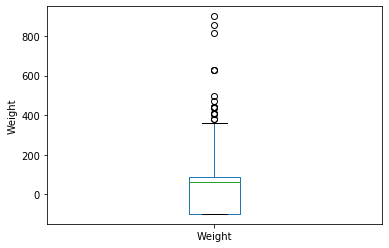

In [12]:
## Boxplot of Weights

heroes_df['Weight'].plot(kind='box')
plt.ylabel('Weight')

weight_mean = round(heroes_df['Weight'].mean(),2)
weight_median = round(heroes_df['Weight'].median(),2)
weight_std = round(heroes_df['Weight'].std(),2)

print("Mean Value for Weight column: {}".format(weight_mean))
print("Median Value for Weight column: {}".format(weight_median))
print("Standard Deviation Value for Weight column: {}".format(weight_std))

Mean Value for Height column: 102.53
Median Value for Height column: 175.0
Standard Deviation Value for Height column: 139.52


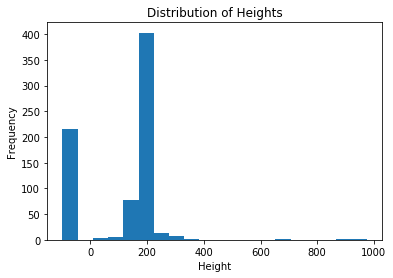

In [13]:
## Histogram of Heights

heroes_df['Height'].plot(kind='hist', bins=20);
plt.title('Distribution of Heights')
plt.xlabel('Height')

height_mean = round(heroes_df['Height'].mean(),2)
height_median = round(heroes_df['Height'].median(),2)
height_std = round(heroes_df['Height'].std(),2)

print("Mean Value for Height column: {}".format(height_mean))
print("Median Value for Height column: {}".format(height_median))
print("Standard Deviation Value for Height column: {}".format(height_std))

Mean Value for Height column: 102.53
Median Value for Height column: 175.0
Standard Deviation Value for Height column: 139.52


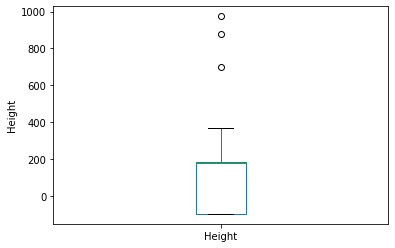

In [14]:
## Boxplot of Heights

heroes_df['Height'].plot(kind='box')
plt.ylabel('Height')

height_mean = round(heroes_df['Height'].mean(),2)
height_median = round(heroes_df['Height'].median(),2)
height_std = round(heroes_df['Height'].std(),2)

print("Mean Value for Height column: {}".format(height_mean))
print("Median Value for Height column: {}".format(height_median))
print("Standard Deviation Value for Height column: {}".format(height_std))

As you can see, both sets of plots are heavily skewed towards impossible values for both weight and height. This is a clear example of where context matters. So before moving on with analysis, it's important we reconcile what exactly to do with this data. This includes whatever we think the mean/std/median are.

From the data set, we notice:

- Weight & Height: -99.0 doesn't make sense, rogue value: unclear how to proceed yet, maybe cross check to see if values coincide between the two columns

- Alignment: '-' no value for around 1% of data set: IMPUTE by deletion, according to mean/median, or random selection according to current distribution
    - "Observation: account for 5% of the data --- Method: randomly select a class acccording to current distribution"
    
    - "rel_prob = [.53, .22, .19] 
        prob = [i/sum(rel_prob) for i in rel_prob]
            def impute_pclass(value):
                if value == '?':
                    return np.random.choice(['3','1','2'], p=prob)
                else:
                    return value"
            df.Pclass = df.Pclass.map(lambda x: impute_pclass(x))
            df.Pclass.value_counts(normalize=True)"
            
- Gender: '-' no value for around 1% of data set: IMPUTE by random selection

- Skin color: '-' no value for 90% of data set --> choice: delete column

- Publisher: looks complete

- Eye Color and Hair color: '-' no value for 23% of data set: unsure

- Race: '-' no value for 41% of data set: unsure

Might be useful to to check to identify commenalities between data sets.

In [15]:
# display(heroes_df['Weight'].value_counts(normalize=True))
# display(heroes_df['Height'].value_counts(normalize=True))

In [16]:
## Ways of creting dataframes for only positive and negative values

# positive_df = heroes_df.loc[((heroes_df['Weight'] >= 0) & (heroes_df['Height'] >= 0))]
# negative_df = heroes_df.loc[((heroes_df['Weight'] < 0) | (heroes_df['Height'] < 0))]
# display(negative_df['Weight'].value_counts())
# display(len(negative_df['Weight']))
# display(negative_df['Height'].value_counts())
# display(len(negative_df['Height']))

In [17]:
# display(positive_df['Weight'].value_counts())
# display(len(positive_df['Height']))

In [18]:
# ## Create dataframe without -99.0 values and  (a better way may be to just get rid of "outliers")

# weighted_h_df = heroes_df.loc[heroes_df['Weight'] != -99.0]
# display(weighted_h_df['Weight'].value_counts())

# ## Weight Distrubition in absence of-99.0 values

# weighted_h_df['Weight'].plot(kind='hist', bins=20);
# plt.title('Distribution of Heights')
# plt.xlabel('Weight')

# del_weight_mean = round(weighted_h_df['Weight'].mean(),2)
# del_weight_median = round(weighted_h_df['Weight'].median(),2)
# del_weight_std = round(weighted_h_df['Weight'].std(),2)

# print("Mean Value for Weight column: {}".format(del_weight_mean))
# print("Median Value for Weight column: {}".format(del_weight_median))
# print("Standard Deviation Value for Weight column: {}".format(del_weight_std))

# ## Investigate heroes list with deleted 
# # weighted_h_df.loc[weighted_h_df['Height'] == -99.0]
# # wayhigh_h_df = weighted_h_df.loc[weighted_h_df['Height'] != -99.0]

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [19]:
heroes_df.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [20]:
#Remove skin color column because more than 90% of data is missing
heroes_df = heroes_df.drop('Skin color', axis=1)
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,bad,-99.0
...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,good,57.0


Since each instance represents a different character, we're going to do our best to keep as much data as possible 

In [21]:
# Alignment rows with '-' value each represent unique superheroes
heroes_df[heroes_df['Alignment'] == '-' ]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
33,Anti-Venom,Male,blue,Symbiote,Blond,229.0,Marvel Comics,-,358.0
110,Blackwulf,Male,red,Alien,White,188.0,Marvel Comics,-,88.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-99.0
426,Man of Miracles,-,blue,God / Eternal,Silver,-99.0,Image Comics,-,-99.0
535,Q,Male,-,God / Eternal,-,-99.0,Star Trek,-,-99.0
676,Trickster,Male,blue,Human,Blond,183.0,DC Comics,-,81.0
692,Venompool,Male,-,Symbiote,-,226.0,Marvel Comics,-,-99.0


In [22]:
heroes_df['Alignment'].value_counts()

good       495
bad        207
neutral     24
-            7
Name: Alignment, dtype: int64

In [23]:
# For those seven values, we will randomly select a class according
# to the current distribution
heroes_df['Alignment'].value_counts(normalize=True)


good       0.675307
bad        0.282401
neutral    0.032742
-          0.009550
Name: Alignment, dtype: float64

In [24]:
align_prob = [0.675, 0.282, 0.033]
prob_a = [i/sum(align_prob) for i in align_prob]
def impute_alignment(value):
    if value == '-':
        return np.random.choice(['good','bad','neutral'], p = prob_a)
    else:
        return value
heroes_df['Alignment'] = heroes_df['Alignment'].map(lambda x: impute_alignment(x))
heroes_df['Alignment'].value_counts(normalize=True)

good       0.680764
bad        0.286494
neutral    0.032742
Name: Alignment, dtype: float64

No more '-' in alignment. Let's try the same thing for gender.

In [25]:
heroes_df['Gender'].value_counts(normalize=True)

Male      0.687585
Female    0.272851
-         0.039563
Name: Gender, dtype: float64

In [26]:
# Observation: account for 3-5% of the data
# Method: randomly select a class acccording to current distribution
gender_prob = [.688, .273]
prob_g = [i/sum(gender_prob) for i in gender_prob]
def impute_gender(value):
    if value == '-':
        return np.random.choice(['Male','Female'], p=prob_g)
    else:
        return value
heroes_df['Gender'] =heroes_df['Gender'].map(lambda x: impute_gender(x))
heroes_df['Gender'].value_counts(normalize=True)

Male      0.71487
Female    0.28513
Name: Gender, dtype: float64

Sweet! Now let's take one last look at the columns for eye & hair color and Race.

In [27]:
display(heroes_df['Hair color'].value_counts())
display(heroes_df['Eye color'].value_counts())
display(heroes_df['Race'].value_counts())
heroes_df[((heroes_df['Hair color'] == '-') | (heroes_df['Eye color'] == '-') | (heroes_df['Race'] == '-'))]

-                   171
Black               158
Blond                99
Brown                86
No Hair              75
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Purple                5
Grey                  5
Brown / White         4
Silver                4
Blue                  3
black                 3
blond                 3
Orange                2
Yellow                2
Red / White           1
Red / Orange          1
Pink                  1
Red / Grey            1
Gold                  1
Indigo                1
Brown / Black         1
Orange / White        1
Black / Blue          1
Magenta               1
Brownn                1
Name: Hair color, dtype: int64

blue                       225
-                          171
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
yellow (without irises)      2
violet                       2
amber                        2
white / red                  1
indigo                       1
silver                       1
bown                         1
green / blue                 1
yellow / blue                1
blue / white                 1
yellow / red                 1
Name: Eye color, dtype: int64

-                  304
Human              207
Mutant              63
God / Eternal       14
Cyborg              11
                  ... 
Human-Vulcan         1
Zen-Whoberian        1
Parademon            1
Human-Vuldarian      1
Xenomorph XX121      1
Name: Race, Length: 62, dtype: int64

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,good,-99.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,good,61.0
10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,good,104.0
11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,bad,108.0
13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,good,90.0
...,...,...,...,...,...,...,...,...,...
723,Wondra,Female,-,-,-,-99.0,Marvel Comics,good,-99.0
724,Wyatt Wingfoot,Male,brown,-,Black,196.0,Marvel Comics,good,117.0
726,X-Man,Male,blue,-,Brown,175.0,Marvel Comics,good,61.0
727,Yellow Claw,Male,blue,-,No Hair,188.0,Marvel Comics,bad,95.0


1. it's not clear why the values are missing, 
2. if we want to compare the data we have without completely  ommitting all of it's categories, we should just find a way to keep it for those studies (Aka w/ hair data, w/ eye data)

In [28]:
hairy_heroes = heroes_df[heroes_df['Hair color'] != '-']
hero_eyes = heroes_df[heroes_df['Eye color'] != '-']
hero_origins = heroes_df[heroes_df['Race'] != '-']
# display(hairy_heroes['Hair color'].value_counts())
# display(hero_eyes['Eye color'].value_counts())
# display(hero_origins['Race'].value_counts())

Though allowing the '-' data to be it's own category is an option. It is not ideal if we want to be able to use every character in our anaylsis. The analysis will not be accurate necessarily, but I will just not that i am choosing to use the mode to replace the categorical variables that are missing.

In [29]:
## Modes

display(hairy_heroes['Hair color'].mode())
display(hero_eyes['Eye color'].mode())
display(hero_origins['Race'].mode())

0    Black
dtype: object

0    blue
dtype: object

0    Human
dtype: object

In [30]:
# Find how many '-' values there are
print(len(heroes_df[heroes_df['Hair color'] == '-']))
print(len(heroes_df[heroes_df['Race'] == '-']))
print(len(heroes_df[heroes_df['Eye color'] == '-']))
# heroes_df.loc[(heroes_df['Eye color'] == '-'), 'Eye color'] = 'blue'

# heroes_df['Hair color'] = hereos_df['Hair color'].fillna(value=hairy_heroes['Hair color'].mode()
# heroes_df['Race'] = hereos_df['Race'].fillna(value=hero_origins['Race'].mode()

171
304
171


In [31]:
#Investigate an entry from each column beforehand 
display(heroes_df['Eye color'][10])
display(heroes_df['Race'][10])
display(heroes_df['Hair color'][10])


'-'

'-'

'-'

In [32]:
heroes_df['Hair color'] = heroes_df['Hair color'].replace({'-': 'Black'})
heroes_df['Eye color'] = heroes_df['Eye color'].replace({'-': 'blue'})
heroes_df['Race'] = heroes_df['Race'].replace({'-': 'Human'})
                                                        

In [33]:
#Investigate an entry from each column afterward 
display(heroes_df['Eye color'][10])
display(heroes_df['Race'][10])
display(heroes_df['Hair color'][10])

'blue'

'Human'

'Black'

Last but not least, let's impute the missing heights and weights with the median/mean. I am choosing the median since our data set has some big outliers.

In [34]:
## Medians
print('Median for Weight is', weight_median)
print('Median for Height is', height_median)

Median for Weight is 62.0
Median for Height is 175.0


In [35]:
## Impute Medians
heroes_df['Height'] = heroes_df['Height'].replace({ -99.0 : height_median})
heroes_df['Weight'] = heroes_df['Weight'].replace({ -99.0 : weight_median})

In [37]:
display(heroes_df['Height'].value_counts())
display(heroes_df['Weight'].value_counts())

175.0    250
183.0     59
188.0     51
178.0     39
180.0     38
185.0     35
168.0     29
165.0     26
170.0     26
193.0     21
191.0     21
198.0     18
173.0     17
201.0     11
196.0     11
163.0      8
213.0      7
211.0      5
203.0      5
157.0      5
244.0      4
229.0      3
155.0      3
218.0      3
226.0      3
122.0      2
30.5       2
206.0      2
305.0      2
137.0      2
279.0      2
366.0      2
234.0      1
297.0      1
267.0      1
304.8      1
701.0      1
61.0       1
876.0      1
259.0      1
15.2       1
287.0      1
71.0       1
257.0      1
66.0       1
160.0      1
140.0      1
64.0       1
142.0      1
62.5       1
108.0      1
79.0       1
975.0      1
Name: Height, dtype: int64

62.0     239
54.0      23
79.0      23
81.0      22
90.0      19
        ... 
412.0      1
38.0       1
96.0       1
320.0      1
855.0      1
Name: Weight, Length: 134, dtype: int64

Mean Value for Weight column: 96.03
Median Value for Weight column: 62.0
Standard Deviation Value for Weight column: 88.85


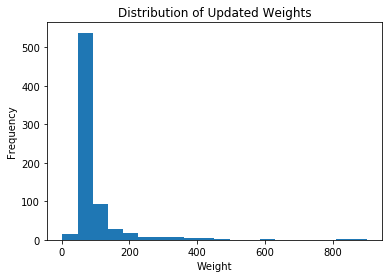

In [39]:
## Histogram of Updated Weights
heroes_df['Weight'].plot(kind='hist', bins=20);
plt.title('Distribution of Updated Weights');
plt.xlabel('Weight');

weight_mean = round(heroes_df['Weight'].mean(),2)
weight_median = round(heroes_df['Weight'].median(),2)
weight_std = round(heroes_df['Weight'].std(),2)

print("Mean Value for Weight column: {}".format(weight_mean))
print("Median Value for Weight column: {}".format(weight_median))
print("Standard Deviation Value for Weight column: {}".format(weight_std))



Mean Value for Weight column: 96.03
Median Value for Weight column: 62.0
Standard Deviation Value for Weight column: 88.85


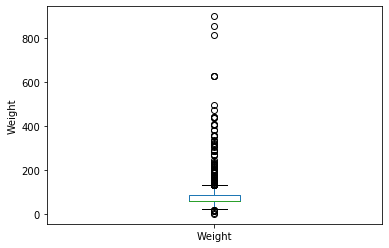

In [40]:
## Boxplot of Updated Weights

heroes_df['Weight'].plot(kind='box')
plt.ylabel('Weight')

weight_mean = round(heroes_df['Weight'].mean(),2)
weight_median = round(heroes_df['Weight'].median(),2)
weight_std = round(heroes_df['Weight'].std(),2)

print("Mean Value for Weight column: {}".format(weight_mean))
print("Median Value for Weight column: {}".format(weight_median))
print("Standard Deviation Value for Weight column: {}".format(weight_std))

Mean Value for Height column: 183.27
Median Value for Height column: 175.0
Standard Deviation Value for Height column: 50.03


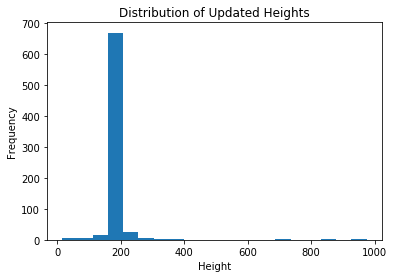

In [41]:
## Histogram of Updated Heights

heroes_df['Height'].plot(kind='hist', bins=20);
plt.title('Distribution of Updated Heights')
plt.xlabel('Height')

height_mean = round(heroes_df['Height'].mean(),2)
height_median = round(heroes_df['Height'].median(),2)
height_std = round(heroes_df['Height'].std(),2)

print("Mean Value for Height column: {}".format(height_mean))
print("Median Value for Height column: {}".format(height_median))
print("Standard Deviation Value for Height column: {}".format(height_std))

Mean Value for Height column: 183.27
Median Value for Height column: 175.0
Standard Deviation Value for Height column: 50.03


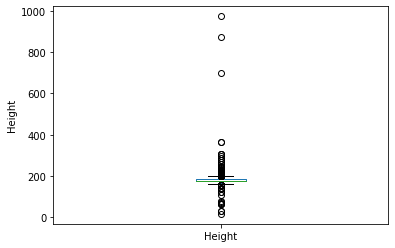

In [42]:
## Boxplot of Updated Heights

heroes_df['Height'].plot(kind='box')
plt.ylabel('Height')

height_mean = round(heroes_df['Height'].mean(),2)
height_median = round(heroes_df['Height'].median(),2)
height_std = round(heroes_df['Height'].std(),2)

print("Mean Value for Height column: {}".format(height_mean))
print("Median Value for Height column: {}".format(height_median))
print("Standard Deviation Value for Height column: {}".format(height_std))

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [46]:
display(heroes_df.head())
display(powers_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
# Change heroes_df column header to hero_names (more specific)
heroes_df = heroes_df.rename(columns={"name": "hero_names"})

#Display change
display(heroes_df.head())
display(powers_df.head())


,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [103]:
print(len(heroes_df))

733


In [71]:
## Replace spaces between column titles so they are easier to access
powers_df.columns = [c.replace(' ', '_') for c in powers_df.columns]

type(powers_df.Accelerated_Healing[1])


numpy.bool_

In [88]:
powers_df['Agility']

0       True
1      False
2       True
3      False
4      False
       ...  
662    False
663    False
664     True
665    False
666    False
Name: Agility, Length: 667, dtype: bool

In [82]:
### Testing dictionary/ list stuff

huehu = []
bub = []
dud = []
for i in range(3):
    huehu.append(i)
    bub.append(i*3)
    dud.append(i/2)
print(huehu)
print(bub)
print(dud)

happy = []

happy.append(huehu)
happy.append(bub)
happy.append(dud)


madlist = ['ded', 'ferfef', 'getgerg']


hubub = dict(zip(madlist,happy))

print(hubub)
hubub['ded']

[0, 1, 2]
[0, 3, 6]
[0.0, 0.5, 1.0]
{'ded': [0, 1, 2], 'ferfef': [0, 3, 6], 'getgerg': [0.0, 0.5, 1.0]}


[0, 1, 2]

In [106]:
# What I would like to do for the powers data frame is collect 
# the powers they do have into a single column called Powers


# print(len(powers_df)) ## used to make sure the total lines we expect
## the code to traverse are known

heroes_list = []
powers_list = []
# counter = 0
for index in powers_df.index:
    powers = []
    for column in powers_df.columns:
        if column == 'hero_names':
            heroes_list.append(powers_df[column][index])
        elif powers_df[column][index] == True:
            powers.append(column)
        else:
            continue
    powers_list.append(powers)
#     counter += 1

##Used to check that parts of the code are functional    
# print(len(heroes_list))
# print(len(powers_list))
# print(counter)

## Use dictionary to organize heroes with their powers

powers_dict = dict(zip(heroes_list,powers_list))
print(powers_dict)






{'3-D Man': ['Agility', 'Super_Strength', 'Stamina', 'Super_Speed'], 'A-Bomb': ['Accelerated_Healing', 'Durability', 'Longevity', 'Super_Strength', 'Stamina', 'Camouflage', 'Self-Sustenance'], 'Abe Sapien': ['Agility', 'Accelerated_Healing', 'Cold_Resistance', 'Durability', 'Underwater_breathing', 'Marksmanship', 'Weapons_Master', 'Longevity', 'Intelligence', 'Super_Strength', 'Telepathy', 'Stamina', 'Immortality', 'Reflexes', 'Enhanced_Sight', 'Sub-Mariner'], 'Abin Sur': ['Lantern_Power_Ring'], 'Abomination': ['Accelerated_Healing', 'Intelligence', 'Super_Strength', 'Stamina', 'Super_Speed', 'Invulnerability', 'Animation', 'Super_Breath'], 'Abraxas': ['Dimensional_Awareness', 'Flight', 'Intelligence', 'Super_Strength', 'Size_Changing', 'Super_Speed', 'Teleportation', 'Magic', 'Dimensional_Travel', 'Immortality', 'Invulnerability', 'Molecular_Manipulation', 'Energy_Manipulation', 'Power_Cosmic'], 'Absorbing Man': ['Cold_Resistance', 'Durability', 'Energy_Absorption', 'Super_Strength', 

In [121]:
## One could use a dictionary to ensure that the powers are matched with
## their superhero...however, since we're controlling the index of the list
## we're just going to pass the power list in as a new column of the data frame
## right next to the hero names in a new column called All_Powers

powers_df.insert(1, "All_Powers", powers_list, True) ## the true adds them permanently to the dataframe (like inplace)
# powers_df = powers_df.drop(['All_Powers'], axis =1) ## just in case you add too many 

powers_df

,hero_names,All_Powers,Agility,Accelerated_Healing,Lantern_Power_Ring,Dimensional_Awareness,Cold_Resistance,Durability,Stealth,Energy_Absorption,...,Web_Creation,Reality_Warping,Odin_Force,Symbiote_Costume,Speed_Force,Phoenix_Force,Molecular_Dissipation,Vision_-_Cryo,Omnipresent,Omniscient
0,3-D Man,"[Agility, Super_Strength, Stamina, Super_Speed]",True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"[Accelerated_Healing, Durability, Longevity, S...",False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"[Agility, Accelerated_Healing, Cold_Resistance...",True,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,[Lantern_Power_Ring],False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"[Accelerated_Healing, Intelligence, Super_Stre...",False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,"[Flight, Energy_Blasts, Size_Changing]",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,"[Cold_Resistance, Durability, Longevity, Super...",False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,"[Agility, Stealth, Danger_Sense, Marksmanship,...",True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire_Control, ...",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [166]:
# now let's see if we can get rid of all the other columns 
# since we already have the info they all represent

powers_df = powers_df.iloc[:, 0:2]

In [134]:
## Let's see what we did
powers_df
## now this is the dataframe we want to combine with the heroes_df

,hero_names,All_Powers
0,3-D Man,"[Agility, Super_Strength, Stamina, Super_Speed]"
1,A-Bomb,"[Accelerated_Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated_Healing, Cold_Resistance..."
3,Abin Sur,[Lantern_Power_Ring]
4,Abomination,"[Accelerated_Healing, Intelligence, Super_Stre..."
...,...,...
662,Yellowjacket II,"[Flight, Energy_Blasts, Size_Changing]"
663,Ymir,"[Cold_Resistance, Durability, Longevity, Super..."
664,Yoda,"[Agility, Stealth, Danger_Sense, Marksmanship,..."
665,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire_Control, ..."


In [173]:
# heroes_df = heroes_df.drop(['All_Powers'], axis =1)
display(heroes_df.head())
display(powers_df.head())

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0


,hero_names,All_Powers
0,3-D Man,"[Agility, Super_Strength, Stamina, Super_Speed]"
1,A-Bomb,"[Accelerated_Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated_Healing, Cold_Resistance..."
3,Abin Sur,[Lantern_Power_Ring]
4,Abomination,"[Accelerated_Healing, Intelligence, Super_Stre..."


In [168]:

# bigOne=[]
# for i in list(range(0, len(heroes_df))):
#     bigOne.append(None)
# superheroes_df['All_Powers'] =bigOne
# superheroes_df

In [220]:
heroes_powers_df = heroes_df.join(powers_df.set_index('hero_names'), on='hero_names')
# result2 = heroes_df.set_index('hero_names').join(powers_df.set_index('hero_names'))
display(heroes_powers_df.head())
# display(result2.head(25))

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,All_Powers
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,"[Accelerated_Healing, Durability, Longevity, S..."
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,"[Agility, Accelerated_Healing, Cold_Resistance..."
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,[Lantern_Power_Ring]
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,"[Accelerated_Healing, Intelligence, Super_Stre..."
4,Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0,"[Dimensional_Awareness, Flight, Intelligence, ..."


In [242]:
Gender_color = []
for i in heroes_powers_df.index:
    if heroes_powers_df.Gender[i] == 'Female':
        Gender_color.append('red')
    elif  heroes_powers_df.Gender[i] == 'Male':
        Gender_color.append('green')
    else:
        print(0)
Gender_color

['green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'red',
 'red',
 'green',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',


In [243]:
heroes_powers_df.insert(2, "Gender_color", Gender_color, True)

In [244]:
heroes_powers_df

,hero_names,Gender,Gender_color,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,All_Powers
0,A-Bomb,Male,green,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,"[Accelerated_Healing, Durability, Longevity, S..."
1,Abe Sapien,Male,green,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,"[Agility, Accelerated_Healing, Cold_Resistance..."
2,Abin Sur,Male,green,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,[Lantern_Power_Ring]
3,Abomination,Male,green,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,"[Accelerated_Healing, Intelligence, Super_Stre..."
4,Abraxas,Male,green,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0,"[Dimensional_Awareness, Flight, Intelligence, ..."
...,...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,red,blue,Human,Strawberry Blond,165.0,Marvel Comics,good,52.0,"[Flight, Energy_Blasts, Size_Changing]"
730,Ymir,Male,green,white,Frost Giant,No Hair,304.8,Marvel Comics,good,62.0,"[Cold_Resistance, Durability, Longevity, Super..."
731,Yoda,Male,green,brown,Yoda's species,White,66.0,George Lucas,good,17.0,"[Agility, Stealth, Danger_Sense, Marksmanship,..."
732,Zatanna,Female,red,blue,Human,Black,170.0,DC Comics,good,57.0,"[Cryokinesis, Telepathy, Magic, Fire_Control, ..."


In [203]:
## Just for kicks, let's find out who we left out of our new dataframe
## We can find a way to add them to the data frame, but we would have to 
## 

pow_list = list(powers_df.hero_names)
hero_list = list(heroes_df.hero_names)
common = list(set(hero_list) & set(pow_list))
diff = list(set(pow_list)-set(common))
diff.sort()
diff

['3-D Man',
 'Bananaman',
 'Bizarro-Girl',
 'Black Vulcan',
 'Blue Streak',
 'Bradley',
 'Clayface',
 'Concrete',
 'Dementor',
 'Doctor Poison',
 'Fire',
 'Hellgramite',
 'Lara Croft',
 'Little Epic',
 'Lord Voldemort',
 'Orion',
 'Peek-a-Boo',
 'Queen Hippolyta',
 'Reactron',
 'SHDB',
 'Stretch Armstrong',
 'TEST',
 'Tommy Clarke',
 'Tyrant']

In [196]:
# e = [1,2,3,2,3]
# f = [1,4,7,8,9,20]
# display(list(set(e) | set(f)))
# display(list(set(e)^set(f)))
# g = list(set(f)&set(e))
# list(set(e)-set(g))

[1, 2, 3, 4, 7, 8, 9, 20]

[2, 3, 4, 20, 7, 8, 9]

[2, 3]

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

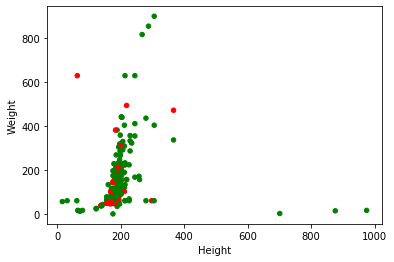

In [253]:
heroes_powers_df.plot.scatter('Height', 'Weight', c=Gender_color)

,hero_names,Gender,Gender_color,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,All_Powers
8,Agent 13,Female,red,blue,Human,Blond,173.0,Marvel Comics,good,61.0,NaN
24,Angel Dust,Female,red,yellow,Mutant,Black,165.0,Marvel Comics,good,57.0,"[Agility, Super_Strength, Stamina, Super_Speed]"
25,Angel Salvadore,Female,red,brown,Human,Black,163.0,Marvel Comics,good,54.0,"[Flight, Animal_Attributes, Animal_Oriented_Po..."
26,Angela,Female,red,blue,Human,Black,175.0,Image Comics,bad,62.0,[Longevity]
38,Arachne,Female,red,blue,Human,Blond,175.0,Marvel Comics,good,63.0,"[Agility, Accelerated_Healing, Durability, Sup..."


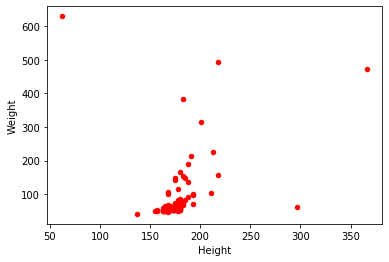

In [249]:
female_heroes_df = heroes_powers_df[heroes_powers_df['Gender'] == 'Female']
display(female_heroes_df.head())
ax1 = female_heroes_df.plot.scatter(x='Height',y='Weight', c ='red')
ax1

,hero_names,Gender,Gender_color,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,All_Powers
0,A-Bomb,Male,green,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,"[Accelerated_Healing, Durability, Longevity, S..."
1,Abe Sapien,Male,green,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,"[Agility, Accelerated_Healing, Cold_Resistance..."
2,Abin Sur,Male,green,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,[Lantern_Power_Ring]
3,Abomination,Male,green,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,"[Accelerated_Healing, Intelligence, Super_Stre..."
4,Abraxas,Male,green,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0,"[Dimensional_Awareness, Flight, Intelligence, ..."


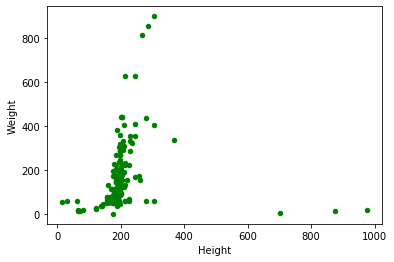

In [250]:
male_heroes_df = heroes_powers_df[heroes_powers_df['Gender'] == 'Male']
display(male_heroes_df.head()) 
ax2 = male_heroes_df.plot.scatter(x='Height',y='Weight', c='green')
ax2

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [256]:
male_heroes_df = heroes_powers_df[heroes_powers_df['Gender'] == 'Male']
female_heroes_df = heroes_powers_df[heroes_powers_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name): ## solutions helped to make it generic for any column of interest
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()
    
    pass

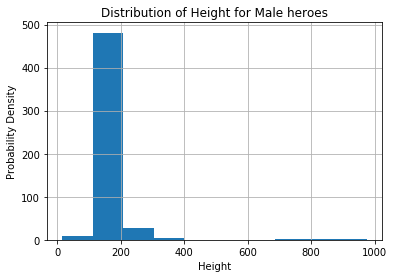

Male Mean Height: 186.6908396946565
Male Median Height: 180.0
Male Standard Deviation Height: 57.440159168787396


In [263]:
# Male Height
show_distplot(male_heroes_df,'Male','Height')
print('Male Mean Height: {}'.format(male_heroes_df.Height.mean()))
print('Male Median Height: {}'.format(male_heroes_df.Height.median()))
print('Male Standard Deviation Height: {}'.format(male_heroes_df.Height.std()))

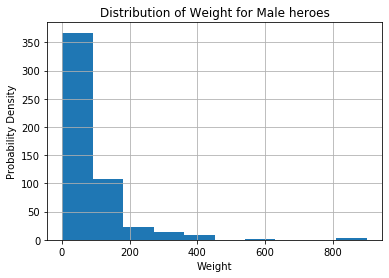

Male Mean Weight: 104.08221797323135
Male Median Weight: 79.0
Male Standard Deviation Weight: 94.82677759118401


In [264]:
# Male Weight
show_distplot(male_heroes_df,'Male','Weight')
print('Male Mean Weight: {}'.format(male_heroes_df.Weight.mean()))
print('Male Median Weight: {}'.format(male_heroes_df.Weight.median()))
print('Male Standard Deviation Weight: {}'.format(male_heroes_df.Weight.std()))

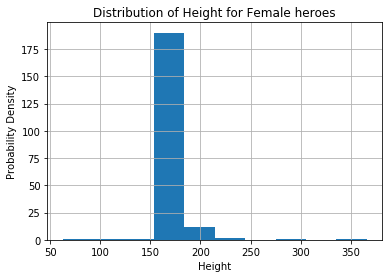

Female Mean Height: 174.69617224880383
Female Median Height: 175.0
Female Standard Deviation Height: 20.26838635111044


In [267]:
# Female Height
show_distplot(female_heroes_df,'Female','Height')
print('Female Mean Height: {}'.format(female_heroes_df.Height.mean()))
print('Female Median Height: {}'.format(female_heroes_df.Height.median()))
print('Female Standard Deviation Height: {}'.format(female_heroes_df.Height.std()))

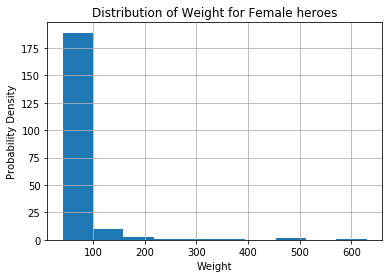

Female Mean Weight: 75.77884615384616
Female Median Weight: 62.0
Female Standard Deviation Weight: 67.71329966350194


In [268]:
# Female Weight
show_distplot(female_heroes_df,'Female','Weight')
print('Female Mean Weight: {}'.format(female_heroes_df.Weight.mean()))
print('Female Median Weight: {}'.format(female_heroes_df.Weight.median()))
print('Female Standard Deviation Weight: {}'.format(female_heroes_df.Weight.std()))

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [320]:
display(powers_df.head())
all_power_freq ={}
for i in powers_df.index:
    for power in powers_df.All_Powers[i]:
        if power not in all_power_freq:
            all_power_freq[power] = 1
        else:
            all_power_freq[power] += 1
most_common_power = max(all_power_freq, key = all_power_freq.get)
most_common_power_cnt = max(all_power_freq.values())
print('Most Common of Powers is {} with a frequency of {}'.format(most_common_power, most_common_power_cnt))
top5_power = sorted(all_power_freq, key=all_power_freq.get, reverse=True)[:5]
top5_power

,hero_names,All_Powers
0,3-D Man,"[Agility, Super_Strength, Stamina, Super_Speed]"
1,A-Bomb,"[Accelerated_Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated_Healing, Cold_Resistance..."
3,Abin Sur,[Lantern_Power_Ring]
4,Abomination,"[Accelerated_Healing, Intelligence, Super_Stre..."


Most Common of Powers is Super_Strength with a frequency of 360


['Super_Strength', 'Stamina', 'Durability', 'Super_Speed', 'Agility']

In [292]:
display(heroes_powers_df.head(25))

,hero_names,Gender,Gender_color,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,All_Powers
0,A-Bomb,Male,green,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,"[Accelerated_Healing, Durability, Longevity, S..."
1,Abe Sapien,Male,green,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,"[Agility, Accelerated_Healing, Cold_Resistance..."
2,Abin Sur,Male,green,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,[Lantern_Power_Ring]
3,Abomination,Male,green,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,"[Accelerated_Healing, Intelligence, Super_Stre..."
4,Abraxas,Male,green,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0,"[Dimensional_Awareness, Flight, Intelligence, ..."
5,Absorbing Man,Male,green,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,"[Cold_Resistance, Durability, Energy_Absorptio..."
6,Adam Monroe,Male,green,blue,Human,Blond,175.0,NBC - Heroes,good,62.0,"[Accelerated_Healing, Immortality, Regeneration]"
7,Adam Strange,Male,green,blue,Human,Blond,185.0,DC Comics,good,88.0,"[Durability, Stealth, Flight, Marksmanship, We..."
8,Agent 13,Female,red,blue,Human,Blond,173.0,Marvel Comics,good,61.0,NaN
9,Agent Bob,Male,green,brown,Human,Brown,178.0,Marvel Comics,good,81.0,[Stealth]


In [301]:
###those Nan values are not goign to be fun to deal with
heroes_powers_df.loc[heroes_powers_df.All_Powers.isnull()]

,hero_names,Gender,Gender_color,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,All_Powers
8,Agent 13,Female,red,blue,Human,Blond,173.0,Marvel Comics,good,61.0,NaN
16,Alfred Pennyworth,Male,green,blue,Human,Black,178.0,DC Comics,good,72.0,NaN
45,Arsenal,Male,green,blue,Human,Black,175.0,DC Comics,good,62.0,NaN
64,Batgirl III,Female,red,blue,Human,Black,175.0,DC Comics,good,62.0,NaN
66,Batgirl V,Female,red,blue,Human,Black,175.0,DC Comics,good,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
714,White Queen,Female,red,blue,Human,Blond,178.0,Marvel Comics,good,65.0,NaN
717,Wiz Kid,Male,green,brown,Human,Black,140.0,Marvel Comics,good,39.0,NaN
723,Wondra,Female,red,blue,Human,Black,175.0,Marvel Comics,good,62.0,NaN
724,Wyatt Wingfoot,Male,green,brown,Human,Black,196.0,Marvel Comics,good,117.0,NaN


In [310]:
counter = 0
for row in heroes_powers_df.loc[heroes_powers_df.All_Powers.isnull()].index:
    heroes_powers_df.at[row, 'All_Powers'] = []
    counter += 1
print(counter)
heroes_powers_df.loc[heroes_powers_df.All_Powers.isnull()]

73


,hero_names,Gender,Gender_color,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,All_Powers


,hero_names,Gender,Gender_color,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,All_Powers
0,A-Bomb,Male,green,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,"[Accelerated_Healing, Durability, Longevity, S..."
1,Abe Sapien,Male,green,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,"[Agility, Accelerated_Healing, Cold_Resistance..."
2,Abin Sur,Male,green,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,[Lantern_Power_Ring]
3,Abomination,Male,green,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,"[Accelerated_Healing, Intelligence, Super_Stre..."
4,Abraxas,Male,green,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0,"[Dimensional_Awareness, Flight, Intelligence, ..."


Most Common of Hero Powers is Super_Strength with a frequency of 362
[('Super_Strength', 362), ('Stamina', 294), ('Durability', 262), ('Super_Speed', 251), ('Agility', 244)]


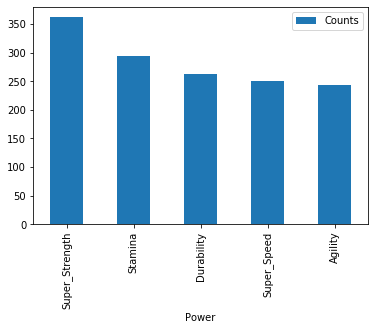

In [334]:
display(heroes_powers_df.head())
all_heropower_freq ={}

for i in heroes_powers_df.index:
    for power in heroes_powers_df.All_Powers[i]:
        if power not in all_heropower_freq:
            all_heropower_freq[power] = 1
        else:
            all_heropower_freq[power] += 1
most_common_heropower = max(all_heropower_freq, key = all_heropower_freq.get)
most_common_heropower_cnt = max(all_heropower_freq.values())
print('Most Common of Hero Powers is {} with a frequency of {}'.format(most_common_heropower, most_common_heropower_cnt))
top5_heropower = sorted(all_heropower_freq.items(), key=lambda x: x[1], reverse=True)[:5]
print(top5_heropower)
pd.DataFrame(top5_heropower, columns=['Power','Counts']).set_index('Power').plot(kind='bar')

,hero_names,Gender,Gender_color,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,All_Powers
0,A-Bomb,Male,green,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,"[Accelerated_Healing, Durability, Longevity, S..."
3,Abomination,Male,green,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,"[Accelerated_Healing, Intelligence, Super_Stre..."
4,Abraxas,Male,green,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0,"[Dimensional_Awareness, Flight, Intelligence, ..."
5,Absorbing Man,Male,green,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,"[Cold_Resistance, Durability, Energy_Absorptio..."
8,Agent 13,Female,red,blue,Human,Blond,173.0,Marvel Comics,good,61.0,[]


Most Common of Marvel Powers is Super_Strength with a frequency of 204
[('Super_Strength', 204), ('Durability', 154), ('Stamina', 150), ('Super_Speed', 137), ('Agility', 126)]


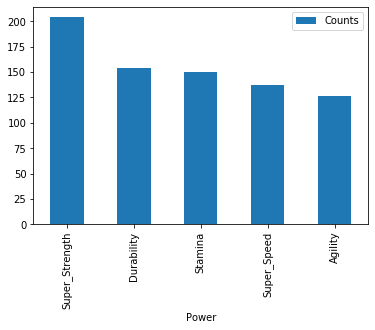

In [335]:
marvel_df = heroes_powers_df[heroes_powers_df['Publisher'] == 'Marvel Comics']
display(marvel_df.head(5))
marvel_power_freq ={}

for i in marvel_df.index:
    for power in marvel_df.All_Powers[i]:
        if power not in marvel_power_freq:
            marvel_power_freq[power] = 1
        else:
            marvel_power_freq[power] += 1
most_common_marvelpower = max(marvel_power_freq, key = marvel_power_freq.get)
most_common_marvelpower_cnt = max(marvel_power_freq.values())
print('Most Common of Marvel Powers is {} with a frequency of {}'.format(most_common_marvelpower, most_common_marvelpower_cnt))
top5_Marvelpower = sorted(marvel_power_freq.items(), key=lambda x: x[1], reverse=True)[:5]
print(top5_Marvelpower)
pd.DataFrame(top5_Marvelpower, columns=['Power','Counts']).set_index('Power').plot(kind='bar')

,hero_names,Gender,Gender_color,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,All_Powers
2,Abin Sur,Male,green,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,[Lantern_Power_Ring]
7,Adam Strange,Male,green,blue,Human,Blond,185.0,DC Comics,good,88.0,"[Durability, Stealth, Flight, Marksmanship, We..."
13,Alan Scott,Male,green,blue,Human,Blond,180.0,DC Comics,good,90.0,"[Flight, Danger_Sense, Intelligence, Telepathy..."
16,Alfred Pennyworth,Male,green,blue,Human,Black,178.0,DC Comics,good,72.0,[]
19,Amazo,Male,green,red,Android,Black,257.0,DC Comics,bad,173.0,"[Agility, Lantern_Power_Ring, Durability, Flig..."


Most Common of DC Powers is Super_Strength with a frequency of 109
[('Super_Strength', 109), ('Stamina', 90), ('Flight', 86), ('Super_Speed', 79), ('Durability', 71)]


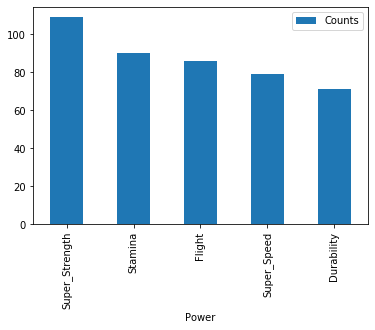

In [336]:
dc_df = heroes_powers_df[heroes_powers_df['Publisher'] == 'DC Comics']
display(dc_df.head(5))
dc_power_freq ={}

for i in dc_df.index:
    for power in dc_df.All_Powers[i]:
        if power not in dc_power_freq:
            dc_power_freq[power] = 1
        else:
            dc_power_freq[power] += 1
most_common_dcpower = max(dc_power_freq, key = dc_power_freq.get)
most_common_dcpower_cnt = max(dc_power_freq.values())
print('Most Common of DC Powers is {} with a frequency of {}'.format(most_common_dcpower, most_common_dcpower_cnt))
top5_DCpower = sorted(dc_power_freq.items(), key=lambda x: x[1], reverse=True)[:5]
print(top5_DCpower)
pd.DataFrame(top5_DCpower, columns=['Power','Counts']).set_index('Power').plot(kind='bar')

In [344]:
print('The top 5 All Hero Powers are {}.\n'.format(top5_heropower))

print('The top 5 Marvel Powers are {}.\n'.format(top5_Marvelpower))

print('The top 5 DC Powers are {}.'.format(top5_DCpower))

The top 5 All Hero Powers are [('Super_Strength', 362), ('Stamina', 294), ('Durability', 262), ('Super_Speed', 251), ('Agility', 244)].

The top 5 Marvel Powers are [('Super_Strength', 204), ('Durability', 154), ('Stamina', 150), ('Super_Speed', 137), ('Agility', 126)].

The top 5 DC Powers are [('Super_Strength', 109), ('Stamina', 90), ('Flight', 86), ('Super_Speed', 79), ('Durability', 71)].


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:

Though their frequency may differ (Super strength, durability, and stamina) are the most prelevant. Of the two publioshers, it would seem Flight is preferred for more DC characters and agility for Marvel character.


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [ ]:
## Which powers have the highest chance of co-occurring in a hero 
## (e.g. super strength and flight), and does this differ by gender?
## Let's explore this by exploring the most common power attribute (strength) 
## and the power that most accompanies that.

In [351]:
strong_heroes_powers = {}
count = 0
for i in heroes_powers_df.index:
    if 'Super_Strength' in heroes_powers_df.All_Powers[i]: 
        for power in heroes_powers_df.All_Powers[i]:
            if power == "Super_Strength":
                continue
            elif power not in strong_heroes_powers:
                strong_heroes_powers[power] = 1
            else:
                strong_heroes_powers[power] += 1
    else:
        continue
top5_strong_powers = sorted(strong_heroes_powers.items(), key=lambda x: x[1], reverse=True)[:5]
print(top5_strong_powers)
# pd.DataFrame(top5_DCpower, columns=['Power','Counts']).set_index('Power').plot(kind='bar')
print('The powers that highest chance of co-occuring in a hero are Super Strength and {}'.format(top5_strong_powers[0][0]))

[('Durability', 232), ('Stamina', 224), ('Super_Speed', 224), ('Agility', 170), ('Flight', 149)]
The powers that highest chance of co-occuring in a hero are Super Strength and Durability


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data